In [18]:
# dependencies  
from sqlalchemy import create_engine
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import pandas as pd
from config import pw
import matplotlib.pyplot as plt
import numpy as np

#create connection
engine = create_engine('postgresql://postgres:' + pw + '@localhost/SQL-Challenge')
connection = engine.connect()

In [3]:
salary_data = pd.read_sql("SELECT * FROM salaries", connection)
salary_data

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


Text(0.5, 1.0, 'Salary Range of Employees')

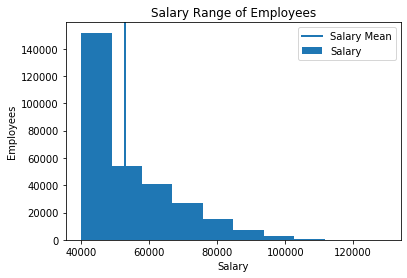

In [24]:
plt.hist(salary_data['salary'], density=False, label="Salary")
plt.axvline(salary_data['salary'].mean(), linewidth=2, label="Salary Mean")
plt.xlabel("Salary")
plt.ylabel("Employees")
plt.legend() 
plt.title("Salary Range of Employees")

In [15]:
#merge all 3 tables
employee_salary = pd.read_sql_query('select salaries.salary, titles.title from salaries join employees on (salaries.emp_no = employees.emp_no) join titles on (employees.emp_title_id = titles.title_id)', connection)
employee_salary.head()

,salary,title
0,40006,Senior Engineer
1,41538,Senior Engineer
2,40000,Staff
3,81662,Staff
4,40919,Technique Leader


In [26]:
#group titles
grouped = employee_salary.groupby(['title'])['salary'].mean()
grouped = pd.DataFrame({"Average Salary": grouped})
grouped

,Average Salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


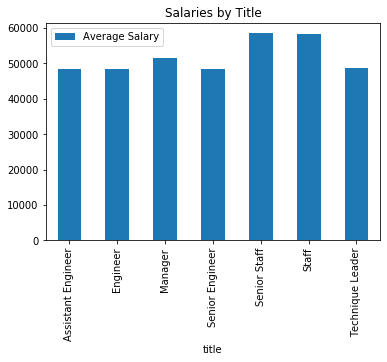

In [27]:
#bar graph
pandas_bar = grouped.plot(kind='bar', title="Salaries by Title")
pandas_bar